In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import cv2
from skimage.color import rgb2gray
from PIL import Image

In [2]:
def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

In [3]:
img_base_path = "../images/dip{}.jpg"

In [4]:
# Read and store images
images = list()
for i in range(1,5):
    images.append(read_image(img_base_path.format(i)))

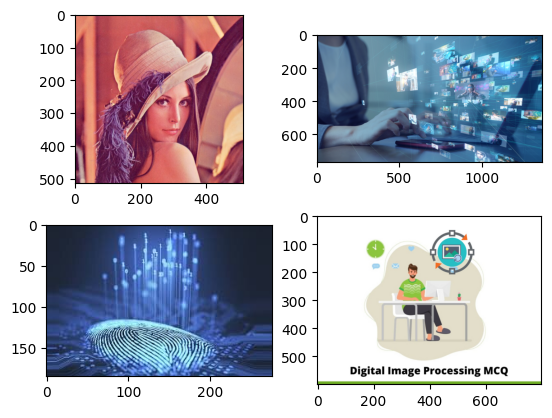

In [5]:
fig,axs = plt.subplots(2,2)
for i in range(4):
    axs[(i)//2,(i)%2].imshow(images[i])

In [6]:
def direct_grayscale(img):
    return (img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3).astype(int)

def direct_grayscale2(img):
    return (img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114).astype(int)

def sklearn_grayscale(img):
    return rgb2gray(img)

def PIL_grayscale(img):
    return np.array(Image.fromarray(img).convert('L'))

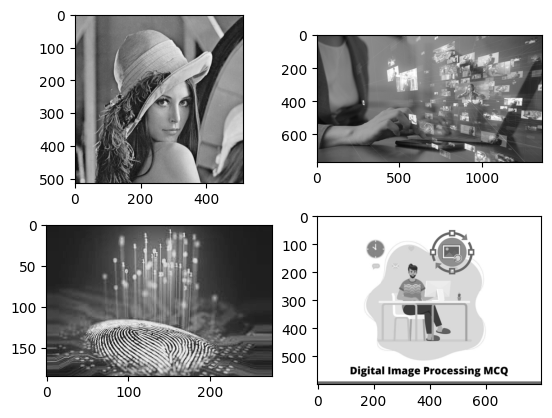

In [7]:
# Show one by one
fig,axs = plt.subplots(2,2)
for i in range(4):
    axs[(i)//2,(i)%2].imshow(direct_grayscale(images[i]), cmap='gray')

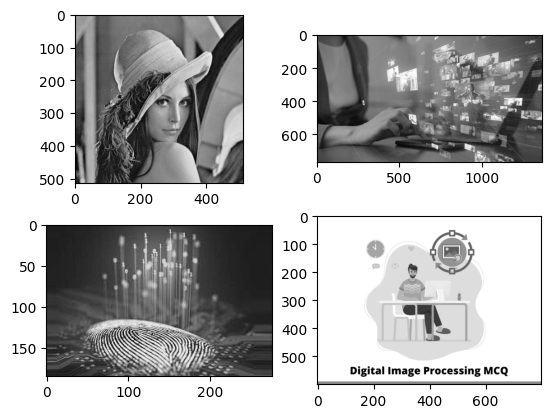

In [8]:
fig,axs = plt.subplots(2,2)
for i in range(4):
    axs[(i)//2,(i)%2].imshow(direct_grayscale2(images[i]), cmap='gray')

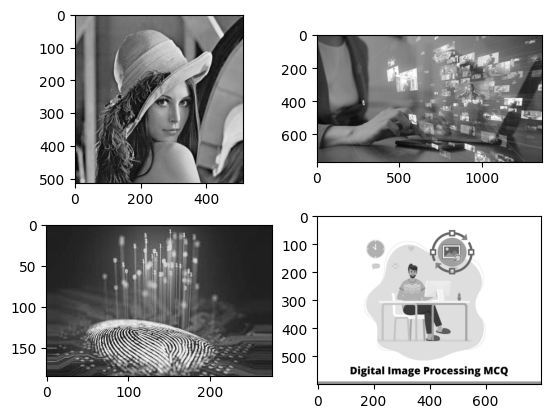

In [9]:
fig,axs = plt.subplots(2,2)
for i in range(4):
    axs[(i)//2,(i)%2].imshow(sklearn_grayscale(images[i]), cmap='gray')

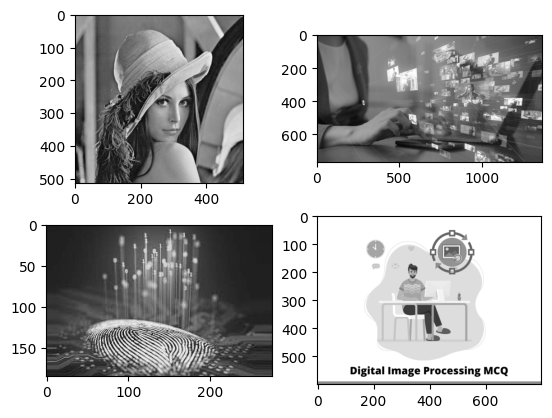

In [10]:
fig,axs = plt.subplots(2,2)
for i in range(4):
    axs[(i)//2,(i)%2].imshow(PIL_grayscale(images[i]), cmap='gray')

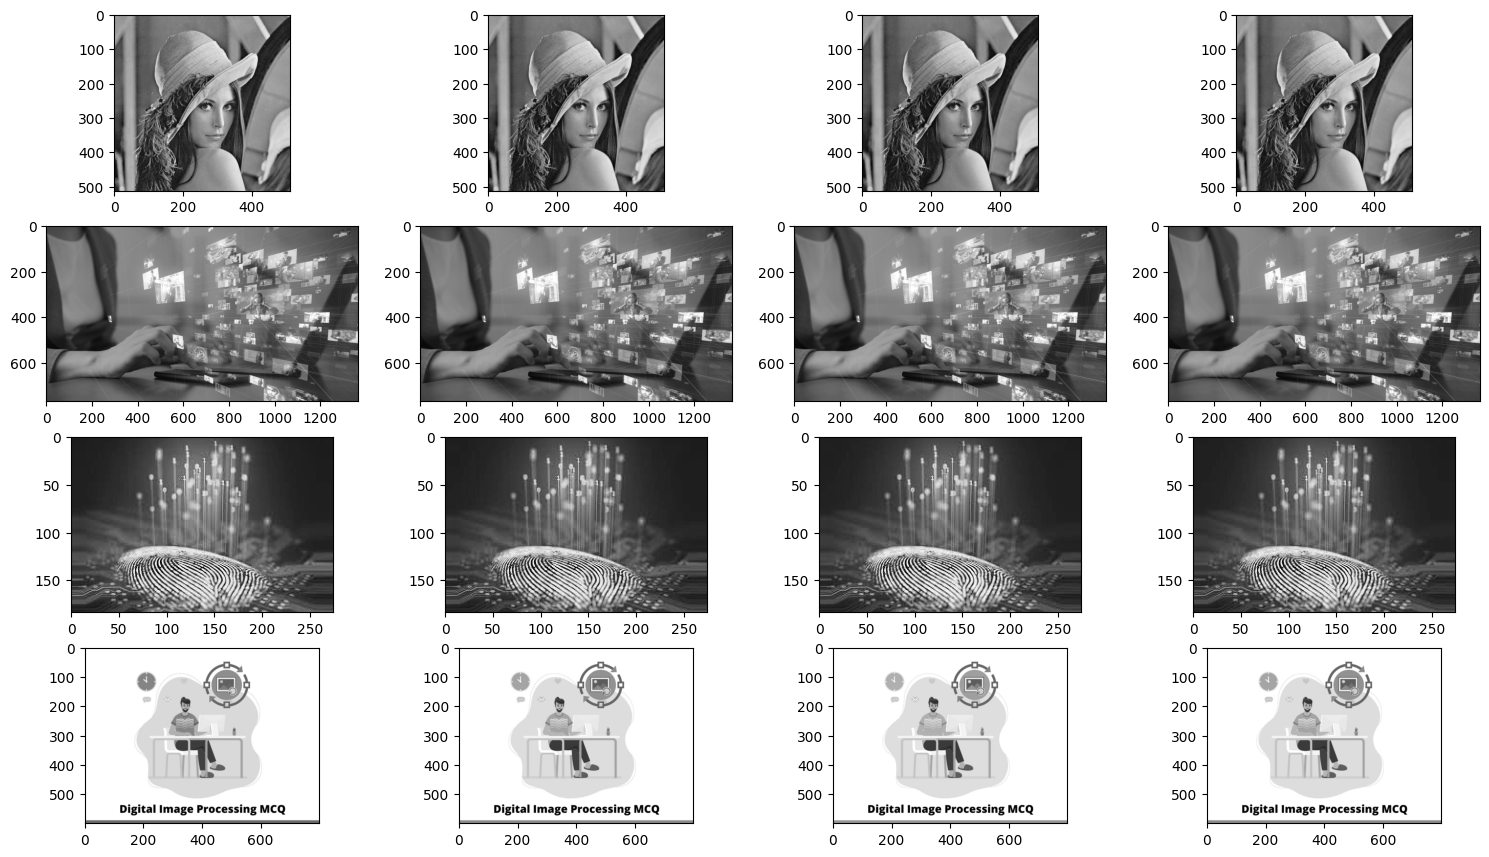

In [11]:
# Show all together for better comparison
fig,axs = plt.subplots(4,4)

for i in range(4):
    axs[i,0].imshow(direct_grayscale(images[i]), cmap='gray')

for i in range(4):
    axs[i,1].imshow(direct_grayscale2(images[i]), cmap='gray')

for i in range(4):
    axs[i,2].imshow(sklearn_grayscale(images[i]), cmap='gray')

for i in range(4):
    axs[i,3].imshow(PIL_grayscale(images[i]), cmap='gray')

fig.set_size_inches(18.5, 10.5)

Saved image at ../images/opencv_frame_1691343786.3195693.png


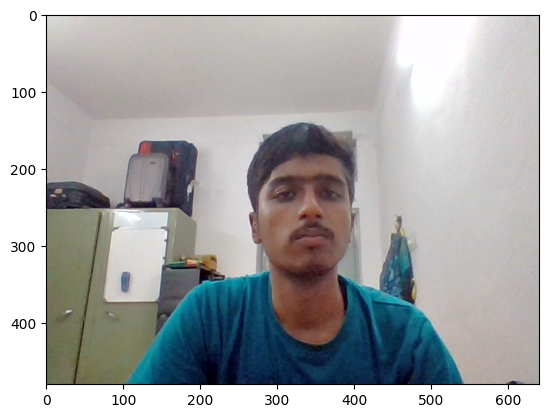

In [12]:
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
if not ret:
    print("failed to grab frame")
else:
    save_path = "../images/opencv_frame_{}.png".format(time.time())
    cv2.imwrite(save_path, frame)
    print("Saved image at {}".format(save_path))

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(image)